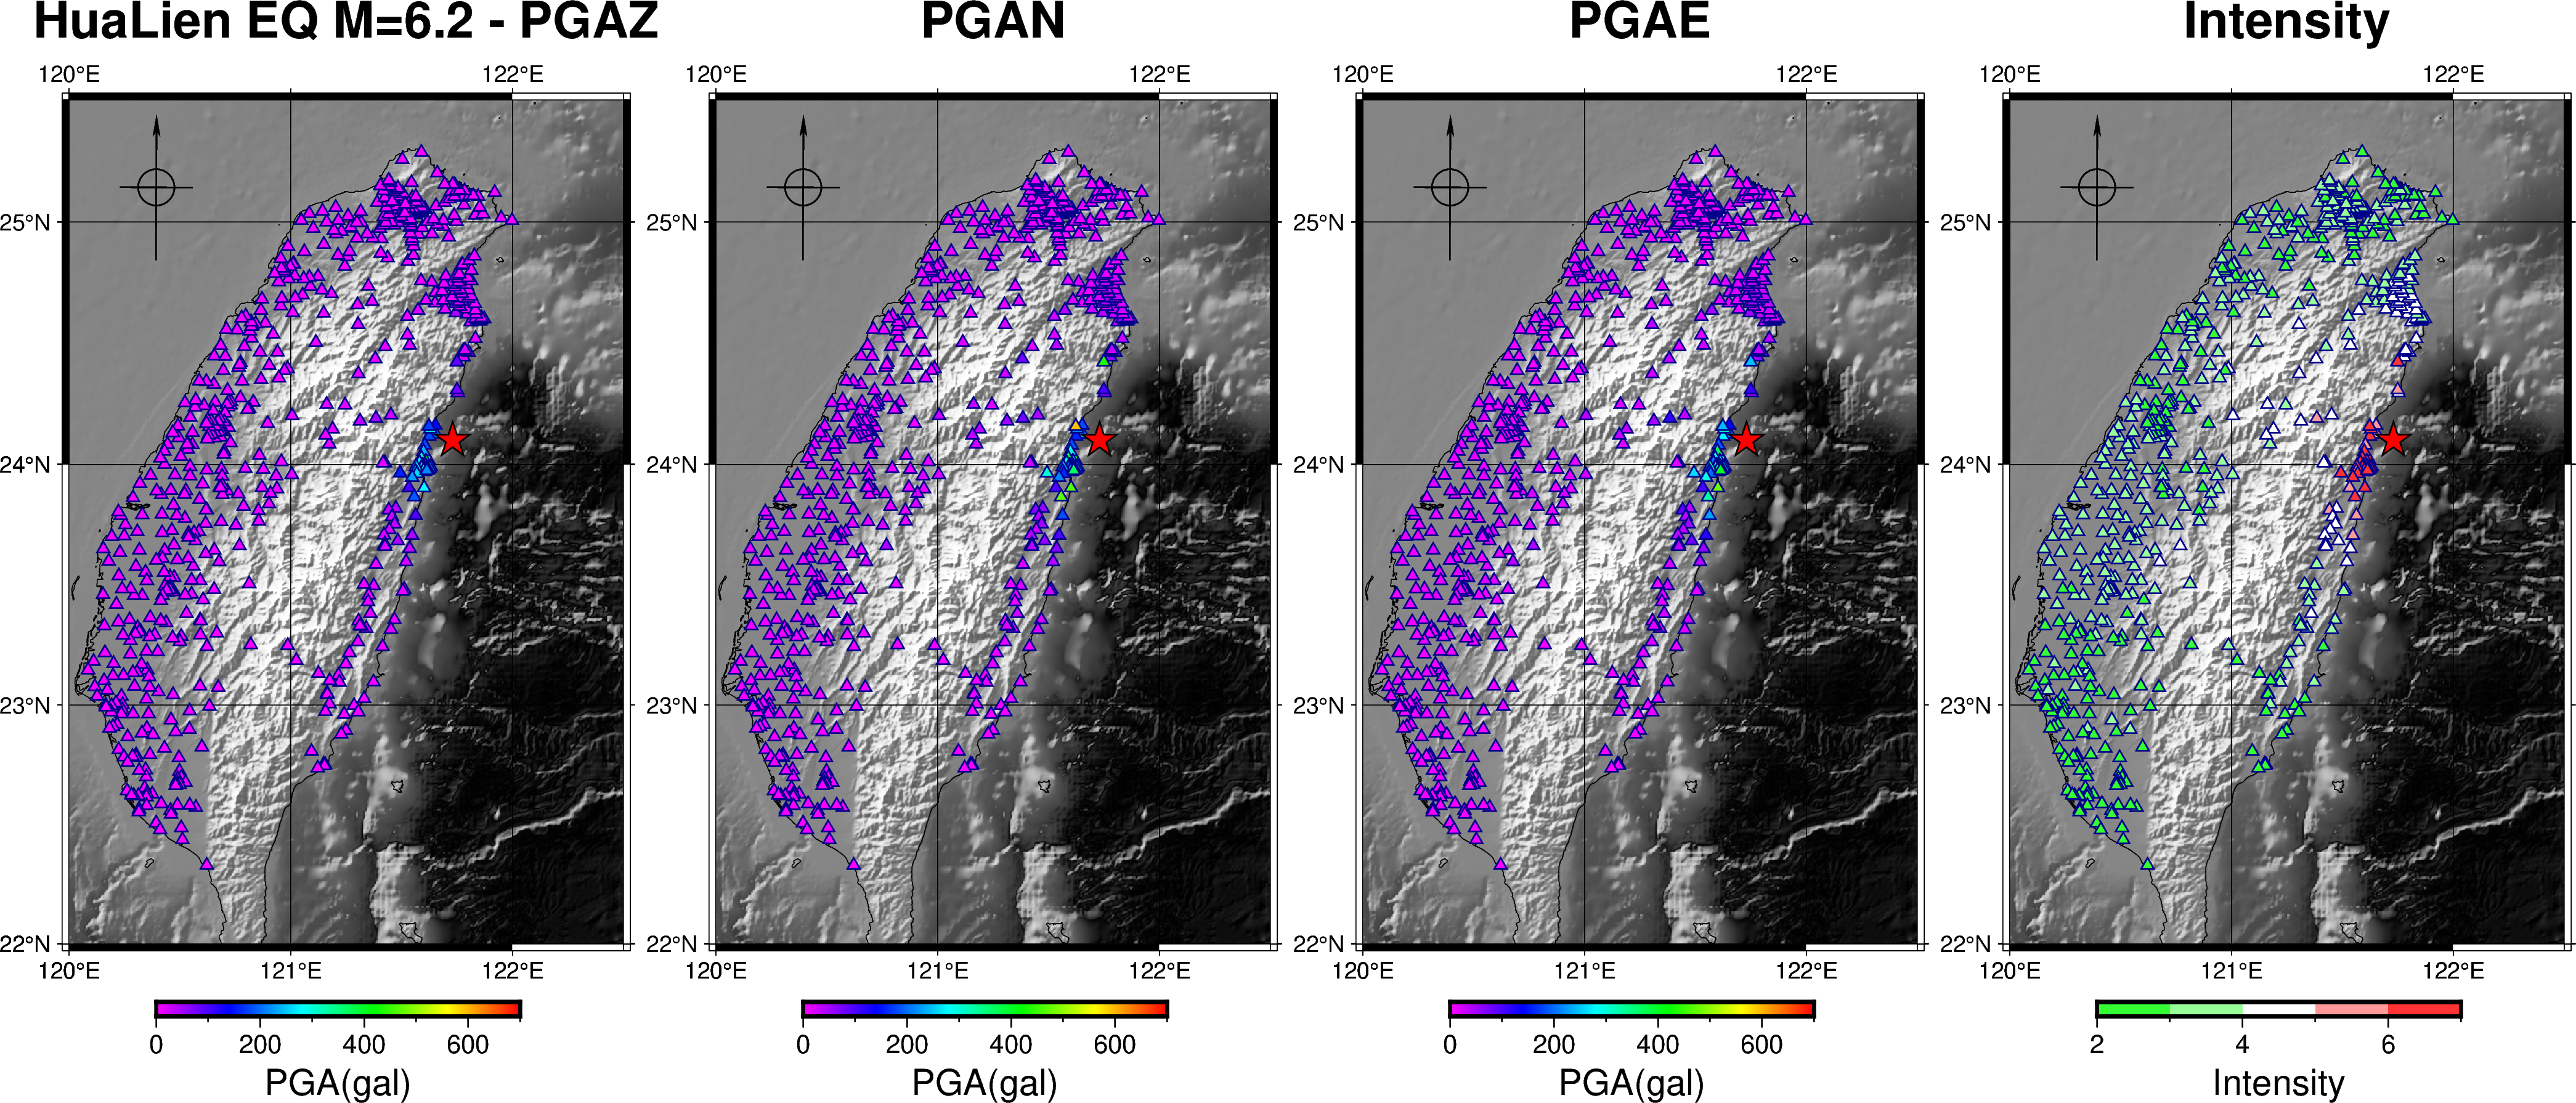

In [3]:
# =================================================================================================================
## Figure 1: PGA for HuaLien earthquake
#==================================================================================================================
import os
import pygmt
import pandas as pd
import numpy as np
import obspy
from obspy import read
from glob import glob
import matplotlib.pyplot as plt
from obspy.clients.iris import Client
from obspy.core import Stream
# --------------------------------------------------------------------------------------
# Reading the data table
table_pre_psa = pd.read_csv(
    '20180206155041.txt',
    skiprows=0,
    delim_whitespace=True,
    names=['Name','lat','long','ele','Intensity','Val1',
           'PGAZ','PGAN','PGAE','DIST','FileName','aItype',
           'Timestamp','Val2'])
# Eq information file
rpfile = '20180206155041.dat';
with open(rpfile,'r',encoding="UTF-8") as f:
    lines = f.readlines()
eqinfor=lines[0];
eqinfor
eqlat1=eqinfor[18:20].strip();eqlat2=eqinfor[20:26].strip();
eqlat=float(eqlat1)+float(eqlat2)/60;
eqlon1=eqinfor[25:28].strip();eqlon2=eqinfor[28:34].strip();
eqlon=float(eqlon1)+float(eqlon2)/60;
eqlat, eqlon
# ------------------------------------------------
fig = pygmt.Figure()
topo_data = '@earth_relief_15s'
# Figure setting
minlon, maxlon = 120, 122.5
minlat, maxlat = 22.0, 25.5
# 
pygmt.makecpt(cmap='gray',series='-3000/3000/100',continuous=True)
#
fig.basemap(
    region=[minlon, maxlon, minlat, maxlat],
    projection='M3i',
    frame=[
        'xafg+l"Latitude (deg)"',
        'yafg+l"Longitude (deg)"',
        'WSen',
    ],
)
# Plot high resolution topographic
fig.grdimage(grid=topo_data, 
#              region=[minlon, maxlon, minlat, maxlat], 
#              projection='M3i', 
             shading=True, 
             frame=False)
#
fig.coast(
    shorelines=True, 
    frame=["a2g1.0",'NSWe+t"HuaLien EQ M=6.2 - PGAZ"'],
    Td='jTL+o0.2c+w2c',
    borders=["1/1.0p,black,2/1.0p,black,3/1.0p,black,"]
)
#
pygmt.makecpt(
#     cmap='wysiwyg',
    cmap='rainbow',
    series=[0, 700, 1],
    continuous=True,
#     reverse=False
)
fig.plot(
    x=table_pre_psa.long,
    y=table_pre_psa.lat,
    style="t0.08i",
    color=table_pre_psa.PGAZ,
    cmap=True,
    pen="0.5p,darkblue"
)
fig.colorbar(
    frame='+l"PGA(gal)"',
    position='x3.7c/-0.8c+w5c+jTC+h'
            )
# fig.legend(position='JTR+jTR+o0.5c/0.5c',box='+gwhite+p0.5p',transparency=10)
fig.plot(
    x=eqlon,
    y=eqlat,
    style="a0.2i",
    color='red',
#     cmap=True,
    pen="0.5p,black"
)
# --------------------------------------------------------------------------------------
fig.shift_origin(xshift="3.5i")
pygmt.makecpt(cmap='gray',series='-3000/3000/100',continuous=True)
fig.basemap(
    region=[minlon, maxlon, minlat, maxlat],
    projection='M3i',
    frame=[
        'xafg+l"Latitude (deg)"',
        'yafg+l"Longitude (deg)"',
        'WSen',
    ],
)
# Plot high resolution topographic
fig.grdimage(grid=topo_data, 
#              region=[minlon, maxlon, minlat, maxlat], 
#              projection='M3i', 
             shading=True, 
             frame=False)
#
fig.coast(
    shorelines=True, 
    frame=["a2g1.0",'NSwe+t"PGAN"'],
    Td='jTL+o0.2c+w2c',
    borders=["1/1.0p,black,2/1.0p,black,3/1.0p,black,"]
)
#
pygmt.makecpt(
#     cmap='wysiwyg',
    cmap='rainbow',
    series=[0, 700, 1],
    continuous=True,
#     reverse=False
)
fig.plot(
    x=table_pre_psa.long,
    y=table_pre_psa.lat,
    style="t0.08i",
    color=table_pre_psa.PGAN,
    cmap=True,
    pen="0.5p,darkblue"
)
fig.colorbar(
    frame='+l"PGA(gal)"',
    position='x3.7c/-0.8c+w5c+jTC+h'
            )
# fig.legend(position='JTR+jTR+o0.5c/0.5c',box='+gwhite+p0.5p',transparency=10)
fig.plot(
    x=eqlon,
    y=eqlat,
    style="a0.2i",
    color='red',
#     cmap=True,
    pen="0.5p,black"
)
# --------------------------------------------------------------------------------------
fig.shift_origin(xshift="3.5i")
pygmt.makecpt(cmap='gray',series='-3000/3000/100',continuous=True)
fig.basemap(
    region=[minlon, maxlon, minlat, maxlat],
    projection='M3i',
    frame=[
        'xafg+l"Latitude (deg)"',
        'yafg+l"Longitude (deg)"',
        'WSen',
    ],
)
# Plot high resolution topographic
fig.grdimage(grid=topo_data, 
#              region=[minlon, maxlon, minlat, maxlat], 
#              projection='M3i', 
             shading=True, 
             frame=False)
#
fig.coast(
    shorelines=True, 
    frame=["a2g1.0",'NSwe+t"PGAE"'],
    Td='jTL+o0.2c+w2c',
    borders=["1/1.0p,black,2/1.0p,black,3/1.0p,black,"]
)
#
pygmt.makecpt(
#     cmap='wysiwyg',
    cmap='rainbow',
    series=[0, 700, 1],
    continuous=True,
#     reverse=False
)
fig.plot(
    x=table_pre_psa.long,
    y=table_pre_psa.lat,
    style="t0.08i",
    color=table_pre_psa.PGAE,
    cmap=True,
    pen="0.5p,darkblue"
)
fig.colorbar(
    frame='+l"PGA(gal)"',
    position='x3.7c/-0.8c+w5c+jTC+h'
            )
# fig.legend(position='JTR+jTR+o0.5c/0.5c',box='+gwhite+p0.5p',transparency=10)
fig.plot(
    x=eqlon,
    y=eqlat,
    style="a0.2i",
    color='red',
#     cmap=True,
    pen="0.5p,black"
)
# --------------------------------------------------------------------------------------
# fig.shift_origin(xshift="3.5i")
# pygmt.makecpt(cmap='gray',series='-3000/3000/100',continuous=True)
# fig.basemap(
#     region=[minlon, maxlon, minlat, maxlat],
#     projection='M3i',
#     frame=[
#         'xafg+l"Latitude (deg)"',
#         'yafg+l"Longitude (deg)"',
#         'WSen',
#     ],
# )
# # Plot high resolution topographic
# fig.grdimage(grid=topo_data, 
# #              region=[minlon, maxlon, minlat, maxlat], 
# #              projection='M3i', 
#              shading=True, 
#              frame=False)
# #
# fig.coast(
#     shorelines=True, 
#     frame=["a2g1.0",'NSwe+t"PGA-symmetrical"'],
#     Td='jTL+o0.2c+w2c',
#     borders=["1/1.0p,black,2/1.0p,black,3/1.0p,black,"]
# )
# #
# pygmt.makecpt(
# #     cmap='wysiwyg',
#     cmap='rainbow',
#     series=[0, 700, 1],
#     continuous=True,
# #     reverse=False
# )
# fig.plot(
#     x=table_pre_psa.long,
#     y=table_pre_psa.lat,
#     style="t0.08i",
#     color=np.sqrt(table_pre_psa.PGAE**2+table_pre_psa.PGAN**2),
#     cmap=True,
#     pen="0.5p,darkblue"
# )
# fig.colorbar(
#     frame='+l"PGA(gal)"',
#     position='x3.7c/-0.8c+w5c+jTC+h'
#             )
# # fig.legend(position='JTR+jTR+o0.5c/0.5c',box='+gwhite+p0.5p',transparency=10)
# fig.plot(
#     x=eqlon,
#     y=eqlat,
#     style="a0.2i",
#     color='red',
# #     cmap=True,
#     pen="0.5p,black"
# )
# # --------------------------------------------------------------------------------------
fig.shift_origin(xshift="3.5i")
pygmt.makecpt(cmap='gray',series='-3000/3000/100',continuous=True)
fig.basemap(
    region=[minlon, maxlon, minlat, maxlat],
    projection='M3i',
    frame=[
        'xafg+l"Latitude (deg)"',
        'yafg+l"Longitude (deg)"',
        'WSen',
    ],
)
# Plot high resolution topographic
fig.grdimage(grid=topo_data, 
#              region=[minlon, maxlon, minlat, maxlat], 
#              projection='M3i', 
             shading=True, 
             frame=False)
#
fig.coast(
    shorelines=True, 
    frame=["a2g1.0",'NSwe+t"Intensity"'],
    Td='jTL+o0.2c+w2c',
    borders=["1/1.0p,black,2/1.0p,black,3/1.0p,black,"]
)
#
pygmt.makecpt(
#     cmap='wysiwyg',
    cmap='red2green',
    series=[2, 7, 1],
    continuous=False,
    reverse=True
)
fig.plot(
    x=table_pre_psa.long,
    y=table_pre_psa.lat,
    style="t0.08i",
    color=(table_pre_psa.Intensity),
    cmap=True,
    pen="0.5p,darkblue"
)
fig.colorbar(
    frame='+l"Intensity"',
    position='x3.7c/-0.8c+w5c+jTC+h'
            )
# fig.legend(position='JTR+jTR+o0.5c/0.5c',box='+gwhite+p0.5p',transparency=10)
fig.plot(
    x=eqlon,
    y=eqlat,
    style="a0.2i",
    color='red',
#     cmap=True,
    pen="0.5p,black"
)
#
fig.show()
# fig.show(method='external')
fig.savefig('20180206155041.png')

In [2]:
table_pre_psa

,Name,lat,long,ele,Intensity,Val1,PGAZ,PGAN,PGAE,DIST,FileName,aItype,Timestamp,Val2
0,Name,lat,long,ele,Intensity,Val1,PGAZ,PGAN,PGAE,DIST,FileName,aItype,Timestamp,Val2
1,HWA047,24.125,121.6548,140,5,8.09,213.3,239.86,216.54,126.0,14003708.CVA,CVA,20180206155007.0,290.0
2,HWA025,24.1617,121.6522,176,5,10.38,143.06,182.0,135.4,263.0,17603727.MNS,NANO,20180206154944.0,311.0
3,HWA026,24.1167,121.6245,390,6,10.87,180.26,158.06,274.6,262.3,39003719.MNS,NANO,20180206154945.0,280.0
4,HWA046,24.1467,121.6292,380,6,11.47,267.32,214.32,315.84,262.2,38003722.MNS,NANO,20180206154945.0,297.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,TAP001,25.0367,121.5138,667,3,106.06,4.64,8.76,6.16,180.0,G6703700.SMT,SMTA,20180206155000.0,348.0
643,TCU076,23.905,120.6835,398,2,108.58,2.62,6.6,5.9,120.0,D9803700.SMT,SMTA,20180206155000.0,259.0
644,TAP007,25.0733,121.5168,279,3,109.89,4.26,9.36,10.04,180.0,C7903700.SMT,SMTA,20180206155000.0,349.0
645,TAP003,25.085,121.4572,003,3,112.57,6.14,8.22,9.5,96.0,A0303700.EVT,ETNA,20180206155049.0,346.0
